# <center> A Neural Network Model for House Prices

### Presentado por:  
*   Andrés Obando
*   Elemento de la lista



The purpose of this notebook is to build a model (Deep Neural Network) with Keras over Tensorflow. We will see the differents steps to do that. This notebook is split in several parts:

- I.    Importation & Devices Available
- II.   Outliers
- III.  Preprocessing
- IV.   KerasRegressor for Contiunuous features
- V.    Predictions


# <center> I. Importation & Devices Available

Importa the data from: https://www.kaggle.com/hendraherviawan/neural-network-starter-using-keras

In [1]:
import os
import keras

Using TensorFlow backend.


In this tutorial our data is composed to 1460 row with 81 features. 38 continuous features and 43 categorical features. As exposed in the introduction we will use onlly the continuous features to build our first model.

Here the objective is to predict the House Prices. In this case we have a regression model to build.
So our first data we will contain 37 features to explain the 'SalePrice'. We can see the list of features that we will use to build our first model.

In [2]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import itertools

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import matplotlib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# We use the train data from Kaggle as the whole data, so we create a new train and test data from this.
#train = pd.read_csv('train.csv')
#train = pd.read_csv('https://github.com/andaoba/AdvancedModels2/raw/master/Tarea%20Predict%20Pricing%20Houses/train.csv')
#print('Shape of the train data with all features:', train.shape)
#train = train.select_dtypes(exclude=['object'])
#print("")
#print('Shape of the train data with numerical features:', train.shape)
#train.drop('Id',axis = 1, inplace = True)
#train.fillna(0,inplace=True)

data = pd.read_csv('https://github.com/andaoba/AdvancedModels2/raw/master/Tarea%20Predict%20Pricing%20Houses/train.csv')
print('Shape of the data with all features:', data.shape)
data = data.select_dtypes(exclude=['object'])
print("")
print('Shape of the data with numerical features:', data.shape)
data.drop('Id',axis = 1, inplace = True)
data.fillna(0,inplace=True)

# This is the Kaggle test file, but we need some test dataset wich contains the labels to evaluate. So we don't use this.
#test = pd.read_csv('https://github.com/andaoba/AdvancedModels2/raw/master/Tarea%20Predict%20Pricing%20Houses/test.csv')
#test = test.select_dtypes(exclude=['object'])
#ID = test.Id
#test.fillna(0,inplace=True)
#test.drop('Id',axis = 1, inplace = True)

# List of features
COLS = list(data.columns)
FEAT=list(data.columns)
FEAT.pop(-1)
#FEATURES = list(data.columns).remove('SalePrice')
LBL = "SalePrice"

# Columns
feature_cols = FEAT


# Train and Test 
x_train, x_test, y_train, y_test = train_test_split(data[FEAT] , data.SalePrice, test_size=0.33, random_state=42)
y_train = pd.DataFrame(y_train, columns = [LBL])
train = pd.DataFrame(x_train, columns = FEAT).merge(y_train, left_index = True, right_index = True)
print("")
print("List of features contained our train dataset:",list(train.columns))
print("")
print('Shape of the train data:', train.shape)
y_test = pd.DataFrame(y_test, columns = [LBL])
test = pd.DataFrame(x_test, columns = FEAT).merge(y_test, left_index = True, right_index = True)
print("")
print("List of features contained our test dataset:",list(train.columns))
print("")
print('Shape of the test data:', test.shape)

Shape of the data with all features: (1460, 81)

Shape of the data with numerical features: (1460, 38)

List of features contained our train dataset: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

Shape of the train data: (978, 37)

List of features contained our test dataset: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',

# <center> II. Outliers

In this small part we will isolate the outliers with an IsolationForest (http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html). I tried with and without this step and I had a better performance removing these rows.

I haven't analysed the test set but I suppose that our train set looks like more at our data test without these outliers.


In [3]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(max_samples = 100, random_state = 42)
clf.fit(train)
y_noano = clf.predict(train)
y_noano = pd.DataFrame(y_noano, columns = ['Top'])
y_noano[y_noano['Top'] == 1].index.values

train = train.iloc[y_noano[y_noano['Top'] == 1].index.values]
train.reset_index(drop = True, inplace = True)
print("Number of Outliers:", y_noano[y_noano['Top'] == -1].shape[0])
Row_WOO = train.shape[0]
print("Number of rows without outliers:", train.shape[0])

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:237: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


Number of Outliers: 98
Number of rows without outliers: 880


In [4]:
train.head(10)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,85,80.0,8800,6,7,1963,1963,156.0,763,0,173,936,1054,0,0,1054,1,0,1,0,3,1,6,0,1963.0,2,480,120,0,0,0,0,0,0,5,2010,137500
1,20,70.0,8402,5,5,2007,2007,0.0,206,0,914,1120,1120,0,0,1120,0,0,1,0,3,1,6,0,0.0,0,0,0,30,0,0,0,0,0,12,2007,147000
2,20,73.0,8688,7,5,2005,2005,228.0,0,0,1616,1616,1616,0,0,1616,0,0,2,0,3,1,7,0,2005.0,3,834,208,59,0,0,0,0,0,4,2006,232000
3,20,79.0,10289,5,7,1965,1965,168.0,836,0,237,1073,1073,0,0,1073,1,0,1,1,3,1,6,0,1965.0,2,515,0,0,0,0,0,0,0,6,2007,156000
4,20,77.0,10010,5,5,1974,1975,0.0,1071,123,195,1389,1389,0,0,1389,1,0,1,0,2,1,6,1,1975.0,2,418,240,38,0,0,0,0,0,4,2006,170000
5,30,0.0,12342,4,5,1940,1950,0.0,262,0,599,861,861,0,0,861,0,0,1,0,1,1,4,0,1961.0,2,539,158,0,0,0,0,0,0,3,2009,82500
6,70,60.0,7200,7,9,1936,2007,0.0,350,210,0,560,575,560,0,1135,1,0,1,0,3,1,6,0,1971.0,2,576,256,0,0,0,0,0,0,4,2009,155000
7,120,39.0,5389,8,5,1995,1996,0.0,1180,0,415,1595,1616,0,0,1616,1,0,2,0,2,1,5,1,1995.0,2,608,237,152,0,0,0,0,0,3,2010,236500
8,20,90.0,10768,5,8,1976,2004,0.0,1157,0,280,1437,1437,0,0,1437,1,0,2,0,3,1,6,1,1976.0,2,528,0,21,0,0,180,0,0,7,2007,218000
9,20,75.0,9750,7,5,2000,2001,171.0,0,0,1630,1630,1630,0,0,1630,0,0,2,0,3,1,6,1,2000.0,2,451,74,234,0,0,0,0,0,10,2009,213000


# <center> III. Preprocessing

To rescale our data we will use the fonction MinMaxScaler of Scikit-learn. I am wondering if it is not interesting to use the same MinMaxScaler for Train and Test !

In [5]:
import warnings
warnings.filterwarnings('ignore')

test2 = test.drop('SalePrice', axis='columns')
col_train = list(train.columns)
col_train_bis = list(train.columns)

#col_train_bis.remove('SalePrice')
col_train_bis.pop(-1)

mat_train = np.matrix(train)
mat_test  = np.matrix(test2)
mat_new = np.matrix(train.drop('SalePrice',axis = 1))
mat_y = np.array(train.SalePrice).reshape((Row_WOO,1))

prepro_y = MinMaxScaler()
prepro_y.fit(mat_y)

prepro = MinMaxScaler()
prepro.fit(mat_train)

prepro_test = MinMaxScaler()
prepro_test.fit(mat_new)

train = pd.DataFrame(prepro.transform(mat_train),columns = col_train)
test  = pd.DataFrame(prepro_test.transform(mat_test),columns = col_train_bis)

train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0.382353,0.255591,0.065877,0.500,0.714286,0.638462,0.216667,0.160000,0.463548,0.000000,0.081565,0.370840,0.295302,0.0,0.0,0.223512,0.5,0.0,0.0,0.0,0.500000,0.0,0.333333,0.000000,0.976617,0.666667,0.393443,0.163043,0.000000,0.0,0.0,0.0,0.0,0.0,0.363636,1.00,0.247700
1,0.000000,0.223642,0.062381,0.375,0.428571,0.976923,0.950000,0.000000,0.125152,0.000000,0.430929,0.443740,0.326942,0.0,0.0,0.247460,0.0,0.0,0.0,0.0,0.500000,0.0,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.082418,0.0,0.0,0.0,0.0,0.0,1.000000,0.25,0.271326
2,0.000000,0.233227,0.064893,0.625,0.428571,0.961538,0.916667,0.233846,0.000000,0.000000,0.761905,0.640254,0.564717,0.0,0.0,0.427431,0.0,0.0,0.5,0.0,0.500000,0.0,0.444444,0.000000,0.997512,1.000000,0.683607,0.282609,0.162088,0.0,0.0,0.0,0.0,0.0,0.272727,0.00,0.482716
3,0.000000,0.252396,0.078955,0.375,0.714286,0.653846,0.250000,0.172308,0.507898,0.000000,0.111740,0.425119,0.304410,0.0,0.0,0.230406,0.5,0.0,0.0,0.5,0.500000,0.0,0.333333,0.000000,0.977612,0.666667,0.422131,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.454545,0.25,0.293708
4,0.000000,0.246006,0.076505,0.375,0.428571,0.723077,0.416667,0.000000,0.650668,0.109139,0.091938,0.550317,0.455896,0.0,0.0,0.345065,0.5,0.0,0.0,0.0,0.333333,0.0,0.333333,0.333333,0.982587,0.666667,0.342623,0.326087,0.104396,0.0,0.0,0.0,0.0,0.0,0.272727,0.00,0.328525


In [0]:
# List of features
COLUMNS = col_train
FEATURES = col_train_bis
LABEL = "SalePrice"

# Columns
feature_cols = FEATURES

# Training set and Prediction set with the features to predict
training_set = train[COLUMNS]
prediction_set = train.SalePrice

# Train and Test 
x_train, x_test, y_train, y_test = train_test_split(training_set[FEATURES] , prediction_set, test_size=0.33, random_state=42)
y_train = pd.DataFrame(y_train, columns = [LABEL])
training_set = pd.DataFrame(x_train, columns = FEATURES).merge(y_train, left_index = True, right_index = True)
training_set.head()

# Training for submission
training_sub = training_set[col_train]

In [7]:
# Same thing but for the test set
y_test = pd.DataFrame(y_test, columns = [LABEL])
testing_set = pd.DataFrame(x_test, columns = FEATURES).merge(y_test, left_index = True, right_index = True)
testing_set.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
331,0.000000,0.230032,0.064471,0.625,0.428571,0.976923,0.966667,0.000000,0.000000,0.0,0.646865,0.543582,0.447747,0.000000,0.0,0.338897,0.0,0.0,0.5,0.0,0.500000,0.0,0.333333,0.0,0.999005,0.666667,0.433607,0.0,0.384615,0.000000,0.0,0.0,0.0,0.0,0.363636,0.50,0.528923
247,0.000000,0.233227,0.067572,0.625,0.428571,0.976923,0.950000,0.000000,0.000000,0.0,0.613861,0.515848,0.414190,0.000000,0.0,0.313498,0.0,0.0,0.5,0.0,0.500000,0.0,0.333333,0.0,0.998507,0.666667,0.357377,0.0,0.060440,0.000000,0.0,0.0,0.0,0.0,0.636364,0.25,0.344653
790,0.000000,0.191693,0.046553,0.375,0.857143,0.784615,0.883333,0.000000,0.495747,0.0,0.000000,0.323296,0.181208,0.000000,0.0,0.137155,0.5,0.0,0.0,0.0,0.333333,0.0,0.111111,0.0,0.987562,0.666667,0.668852,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.454545,0.50,0.248943
316,0.294118,0.191693,0.042644,0.500,0.857143,0.307692,0.816667,0.000000,0.000000,0.0,0.288072,0.242076,0.150048,0.379268,0.0,0.335269,0.0,0.0,0.5,0.0,0.500000,0.0,0.333333,0.0,0.955224,0.666667,0.411475,0.0,0.000000,0.254545,0.0,0.0,0.0,0.0,0.454545,0.50,0.224074
215,0.000000,0.239617,0.057752,0.375,0.571429,0.623077,0.183333,0.139487,0.347509,0.0,0.269684,0.453249,0.338447,0.000000,0.0,0.256168,0.5,0.0,0.0,0.0,0.500000,0.0,0.333333,0.0,0.975622,0.666667,0.373770,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.727273,0.50,0.253793


# <center> IV. Deep Neural Network for continuous features

With tf.contrib.learn it is very easy to implement a Deep Neural Network. In our example we will have 5 hidden layers with repsectly 200, 100, 50, 25 and 12 units and the function of activation will be Relu.

The optimizer used in our case is an AdaDelta  optimizer.

In [8]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

seed = 7
np.random.seed(seed)


# Model
model = Sequential()
model.add(Dense(200, input_dim=36, kernel_initializer='normal', activation='relu'))
model.add(Dense(100, kernel_initializer='normal', activation='relu'))
model.add(Dense(50, kernel_initializer='normal', activation='relu'))
model.add(Dense(25, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
# Compile model
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adadelta())

feature_cols = training_set[FEATURES]
labels = training_set[LABEL].values

model.fit(np.array(feature_cols), np.array(labels), epochs=100, batch_size=10)








Epoch 1/100





589/589 [==============================] - 0s 571us/step - loss: 0.0347
Epoch 2/100
589/589 [==============================] - 0s 161us/step - loss: 0.0083
Epoch 3/100
589/589 [==============================] - 0s 162us/step - loss: 0.0070
Epoch 4/100
589/589 [==============================] - 0s 171us/step - loss: 0.0054
Epoch 5/100
589/589 [==============================] - 0s 167us/step - loss: 0.0048
Epoch 6/100
589/589 [==============================] - 0s 176us/step - loss: 0.0048
Epoch 7/100
589/589 [==============================] - 0s 160us/step - loss: 0.0047
Epoch 8/100
589/589 [==============================] - 0s 178us/step - loss: 0.0054
Epoch 9/100
589/589 [==============================] - 0s 170us/step - loss: 0.0045
Epoch 10/100
589/589 [==============================] - 0s 155us/step - loss: 0.0043
Epoch 11/100
589/589 [==============================] - 0s 161us/step - loss: 0.0046
Epoch 12/100
589/589 [==============================] - 0s 154

In [9]:
# Evaluation on the test set created by train_test_split
model.evaluate(np.array(feature_cols), np.array(labels))

589/589 [==============================] - 0s 91us/step


0.003955309654005719

In [0]:
# Predictions
feature_cols_test = testing_set[FEATURES]
labels_test = testing_set[LABEL].values

y = model.predict(np.array(feature_cols_test))
predictions = list(itertools.islice(y, testing_set.shape[0]))


In [0]:
Rows_Predictions = testing_set.shape[0]

# <center> V. Predictions and Ploting

Used our model to make the predictions with the data set Test. And add one graphic to see the difference between the reality and the predictions.

In [0]:
predictions = prepro_y.inverse_transform(np.array(predictions).reshape(Rows_Predictions,1))

In [13]:
predictions.tolist

<function ndarray.tolist>

In [0]:
reality = pd.DataFrame(prepro.inverse_transform(testing_set), columns = [COLUMNS]).SalePrice

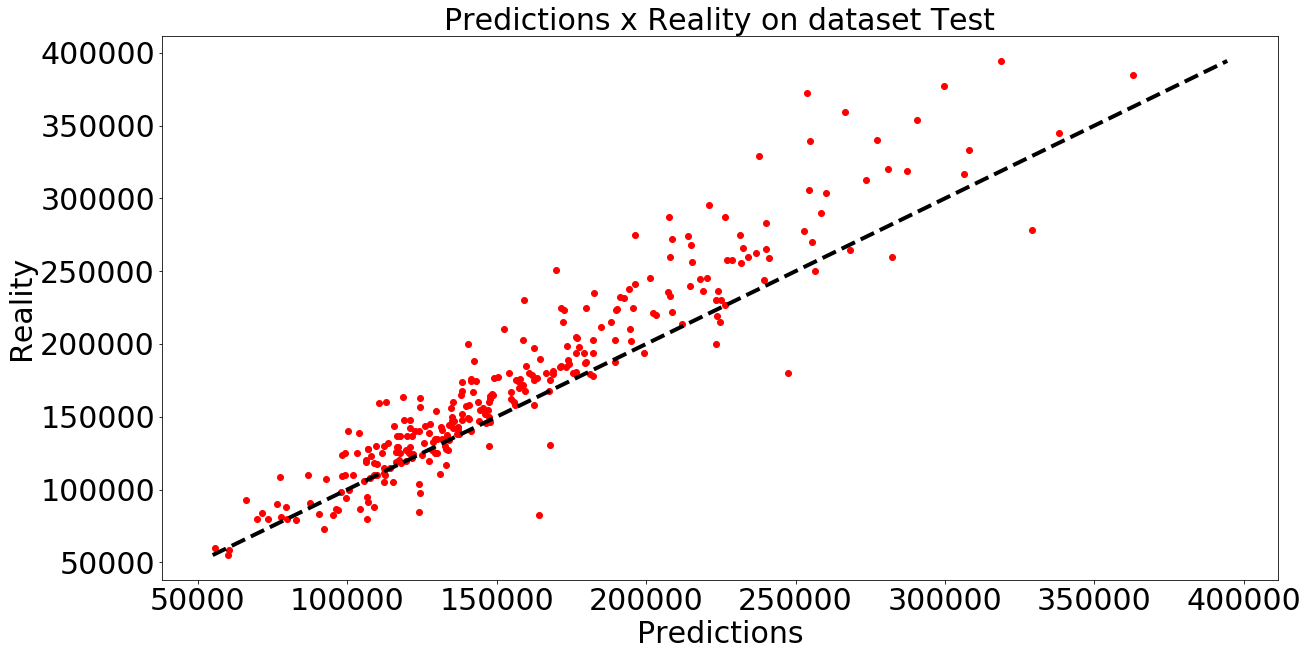

In [15]:
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30) 

fig, ax = plt.subplots(figsize=(20, 10))

plt.style.use('ggplot')
plt.plot(predictions, reality.values, 'ro')
plt.xlabel('Predictions', fontsize = 30)
plt.ylabel('Reality', fontsize = 30)
plt.title('Predictions x Reality on dataset Test', fontsize = 30)
ax.plot([reality.min(), reality.max()], [reality.min(), reality.max()], 'k--', lw=4)
plt.show()

# <center> VI. Tunning Parameters and Hyperparameters  
Let's go to adjust some Parameters and hyperparameters and see what happen on the evaluation result.

## Batch

In [16]:
batches = [5,10,30,50,100]
result = []
for b in batches:
  model.fit(np.array(feature_cols), np.array(labels), epochs=100, batch_size=b)
  md=model.evaluate(np.array(feature_cols), np.array(labels))
  print('Iteración {}'.format(b))
  result.append(md)
result

Epoch 1/100
589/589 [==============================] - 0s 327us/step - loss: 0.0026
Epoch 2/100
589/589 [==============================] - 0s 314us/step - loss: 0.0027
Epoch 3/100
589/589 [==============================] - 0s 307us/step - loss: 0.0023
Epoch 4/100
589/589 [==============================] - 0s 325us/step - loss: 0.0025
Epoch 5/100
589/589 [==============================] - 0s 343us/step - loss: 0.0023
Epoch 6/100
589/589 [==============================] - 0s 329us/step - loss: 0.0023
Epoch 7/100
589/589 [==============================] - 0s 335us/step - loss: 0.0021
Epoch 8/100
589/589 [==============================] - 0s 302us/step - loss: 0.0024
Epoch 9/100
589/589 [==============================] - 0s 319us/step - loss: 0.0024
Epoch 10/100
589/589 [==============================] - 0s 319us/step - loss: 0.0022
Epoch 11/100
589/589 [==============================] - 0s 316us/step - loss: 0.0023
Epoch 12/100
589/589 [==============================] - 0s 324us/step - lo

[0.0023992948759037286,
 0.0007759087267592676,
 0.000695310241316646,
 0.00047632381248846015,
 0.0011187095931495567]

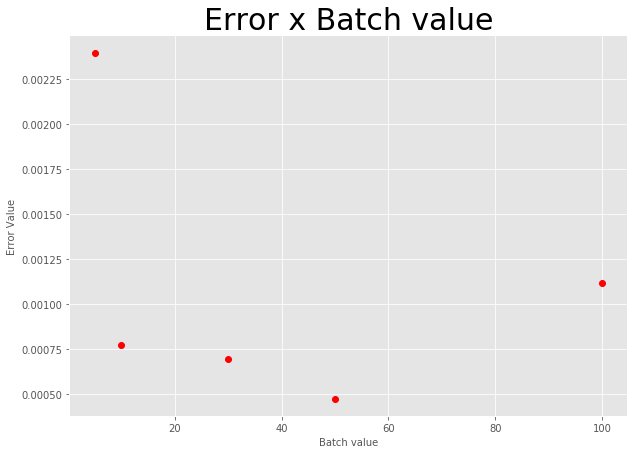

In [17]:
matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10) 

fig, ax = plt.subplots(figsize=(10, 7))

plt.style.use('ggplot')
plt.plot(batches, result, 'ro')
plt.xlabel('Batch value', fontsize = 10)
plt.ylabel('Error Value', fontsize = 10)
plt.title('Error x Batch value', fontsize = 30)
#ax.plot([reality.min(), reality.max()], [reality.min(), reality.max()], 'k--', lw=4)
plt.show()

Se observa un menor error en un valor de Batch de 10 o de 50, sin embargo, se prefiere 10 porque es más eficiente computacionalmente.

### Epoc

In [18]:
epochs = [50,100,200,500,1000]
result = []
for b in epochs:
  model.fit(np.array(feature_cols), np.array(labels), epochs=b, batch_size=10)
  md=model.evaluate(np.array(feature_cols), np.array(labels))
  print('Iteración {}'.format(b))
  result.append(md)
result

Epoch 1/50
589/589 [==============================] - 0s 176us/step - loss: 0.0012
Epoch 2/50
589/589 [==============================] - 0s 165us/step - loss: 0.0011
Epoch 3/50
589/589 [==============================] - 0s 152us/step - loss: 9.2692e-04
Epoch 4/50
589/589 [==============================] - 0s 162us/step - loss: 8.3079e-04
Epoch 5/50
589/589 [==============================] - 0s 190us/step - loss: 7.0545e-04
Epoch 6/50
589/589 [==============================] - 0s 177us/step - loss: 6.9995e-04
Epoch 7/50
589/589 [==============================] - 0s 170us/step - loss: 7.1532e-04
Epoch 8/50
589/589 [==============================] - 0s 164us/step - loss: 7.0956e-04
Epoch 9/50
589/589 [==============================] - 0s 174us/step - loss: 6.4637e-04
Epoch 10/50
589/589 [==============================] - 0s 179us/step - loss: 7.0146e-04
Epoch 11/50
589/589 [==============================] - 0s 158us/step - loss: 6.2702e-04
Epoch 12/50
589/589 [============================

[0.0005047042389259577,
 0.0001998176775099504,
 7.600916927270844e-05,
 0.00023856089653602228,
 9.522170622297247e-06]

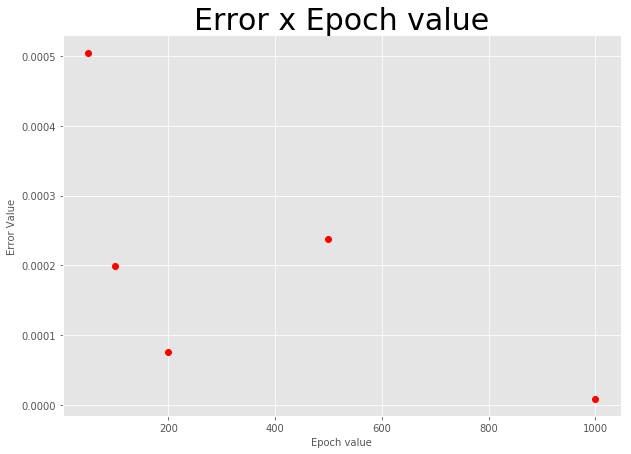

In [19]:
matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10) 

fig, ax = plt.subplots(figsize=(10, 7))

plt.style.use('ggplot')
plt.plot(epochs, result, 'ro')
plt.xlabel('Epoch value', fontsize = 10)
plt.ylabel('Error Value', fontsize = 10)
plt.title('Error x Epoch value', fontsize = 30)
#ax.plot([reality.min(), reality.max()], [reality.min(), reality.max()], 'k--', lw=4)
plt.show()

Se observa un mínimo error con 1000 épocas, por lo que una buena combinación sería:  

*   Batch=10
*   Epoch=1000

El resultado sería un error de: 9.522170622297247e-06



